In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Billionaire.csv')
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [7]:
df = data['Age']
mean_ages = df.mean()
var_ages = df.var()
mean_ages, var_ages

(63.1136023916293, 180.77213640110082)

In [23]:
data['NetWorth'] = data['NetWorth'].str.strip('$')
data['NetWorth'] = data['NetWorth'].str.strip(' B')
data['NetWorth'] = data['NetWorth'].apply(float) 
data['NetWorth'].head(10)

0    177.0
1    151.0
2    150.0
3    124.0
4     97.0
5     96.0
6     93.0
7     91.5
8     89.0
9     84.5
Name: NetWorth, dtype: float64

In [30]:
df = data[['NetWorth', 'Country']]
df = df.groupby(['Country']).sum()
df = df.sort_values(by='NetWorth', ascending=False).reset_index()
df

,Country,NetWorth
0,United States,4398.4
1,China,2531.9
2,Germany,625.5
3,India,596.4
4,Russia,586.0
...,...,...
65,Oman,2.3
66,St. Kitts and Nevis,1.6
67,Tanzania,1.6
68,Zimbabwe,1.5


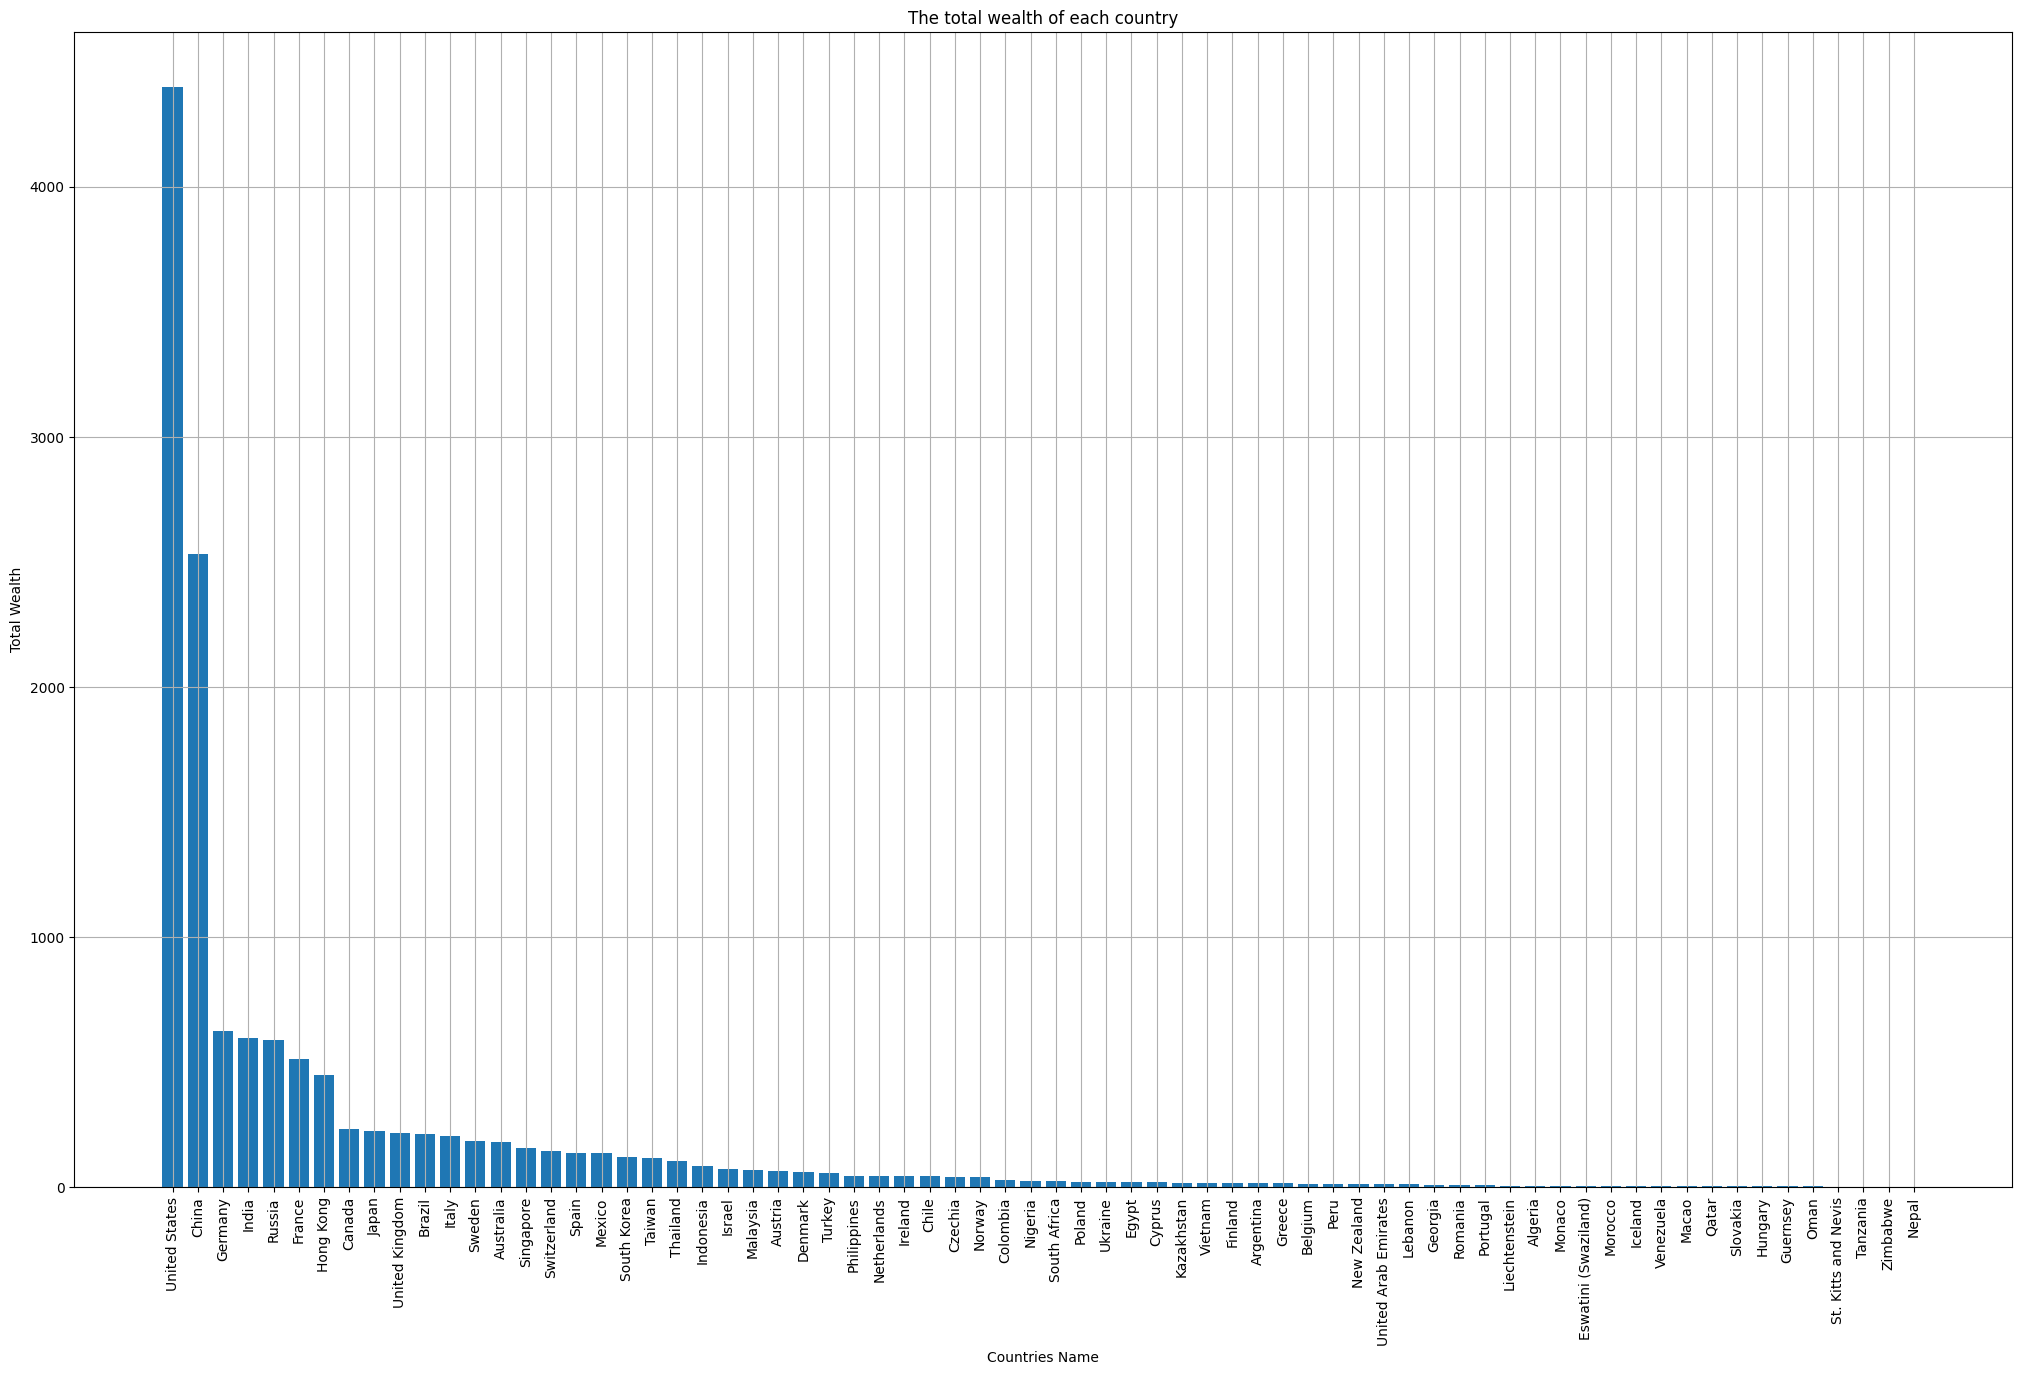

In [41]:
plt.figure(figsize=(25, 15))
plt.bar(df['Country'], df['NetWorth'])
plt.xticks(rotation = 90)
plt.title('The total wealth of each country')
plt.ylabel('Total Wealth')
plt.xlabel('Countries Name')
plt.grid()
plt.show()

In [61]:
df = data[['Name', 'Country', 'NetWorth']]
df = df.loc[df['Country'] == 'United States'].reset_index()
df = df[['Name', 'Country', 'NetWorth']].head(10)
df 

,Name,Country,NetWorth
0,Jeff Bezos,United States,177.0
1,Elon Musk,United States,151.0
2,Bill Gates,United States,124.0
3,Mark Zuckerberg,United States,97.0
4,Warren Buffett,United States,96.0
5,Larry Ellison,United States,93.0
6,Larry Page,United States,91.5
7,Sergey Brin,United States,89.0
8,Steve Ballmer,United States,68.7
9,Alice Walton,United States,61.8


In [67]:
values = df['NetWorth'].head(10)
values

0    177.0
1    151.0
2    124.0
3     97.0
4     96.0
5     93.0
6     91.5
7     89.0
8     68.7
9     61.8
Name: NetWorth, dtype: float64

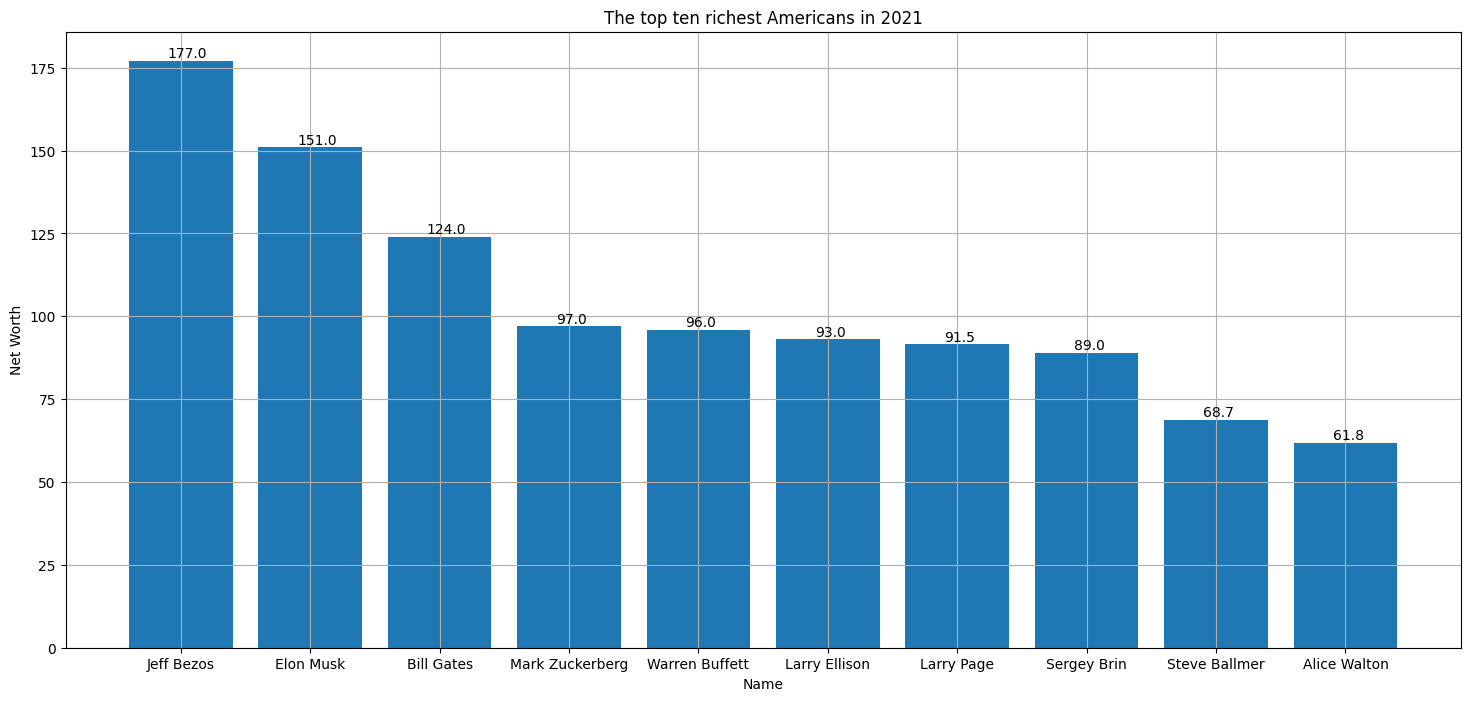

In [74]:
plt.figure(figsize=(18, 8))
plt.bar(df['Name'], df['NetWorth'])
for i, v in enumerate(df['NetWorth'].head(10)):
    plt.text((i - 0.1), (v + 1), str(v))
plt.title('The top ten richest Americans in 2021')
plt.ylabel('Net Worth')
plt.xlabel('Name')
plt.grid()
plt.show()

In [90]:
data[['Country']].nunique()

Country    70
dtype: int64

In [98]:
df = data[['Country']].value_counts().reset_index()
df.columns = ['Country', 'Number']
df = df.tail(11)
df

,Country,Number
59,Venezuela,1
60,Algeria,1
61,Tanzania,1
62,St. Kitts and Nevis,1
63,Oman,1
64,Nepal,1
65,Macao,1
66,Liechtenstein,1
67,Guernsey,1
68,Eswatini (Swaziland),1


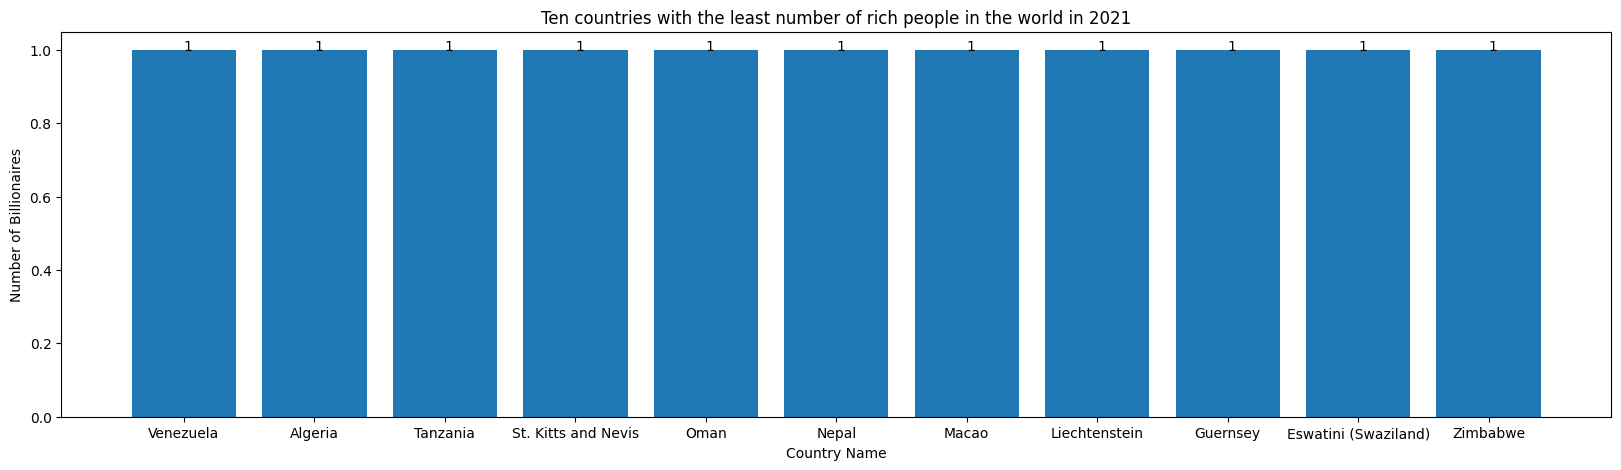

In [105]:
plt.figure(figsize=(20, 5))
plt.bar(df['Country'], df['Number'])
for i, v in enumerate(df['Number']):
    plt.text(i, v, v)
plt.title('Ten countries with the least number of rich people in the world in 2021')
plt.ylabel('Number of Billionaires')
plt.xlabel('Country Name')
plt.show()

In [106]:
len(df[df['Country'].map(lambda x: x == 'Iran')])

0